<a href="https://colab.research.google.com/github/leandroboteon/regressao-invest-mkt/blob/main/Regressao_para_MKT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio: Construindo um Modelo de Regressão para Marketing**

### Descrição do Projeto

Este projeto visa construir um modelo de regressão para prever o valor de vendas com base em investimentos em plataformas de publicidade online, como Youtube, Facebook e Newspapers.

## **Etapa 01: Análise Descritiva**

Nesta etapa, foram utilizadas as bibliotecas Pandas, Numpy, Matplotlib e Seaborn para importação e manipulação de dados, realização de análises estatísticas e visualização de dados.

In [ ]:
# importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importando o dataframe
df = pd.read_csv("/content/drive/MyDrive/Formação em Dados/Desafio 04/MKT.csv", sep=",")

In [ ]:
df.head()

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [ ]:
# verificando o tipo dos dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   youtube    171 non-null    float64
 1   facebook   171 non-null    float64
 2   newspaper  171 non-null    float64
 3   sales      171 non-null    float64
dtypes: float64(4)
memory usage: 5.5 KB


In [ ]:
df.describe()

,youtube,facebook,newspaper,sales
count,171.000000,171.000000,171.000000,171.000000
mean,178.021053,27.671579,35.240000,16.922807
std,102.449597,17.913532,24.902918,6.314608
min,0.840000,0.000000,0.360000,1.920000
25%,91.080000,11.700000,13.740000,12.540000
50%,179.760000,26.760000,31.080000,15.480000
75%,262.980000,43.680000,50.880000,20.820000
max,355.680000,59.520000,121.080000,32.400000


## **Etapa 02: Análise Exploratória**

Nesta etapa, foram utilizadas técnicas de visualização de dados e análises estatísticas para identificar possíveis correlações entre as variáveis.

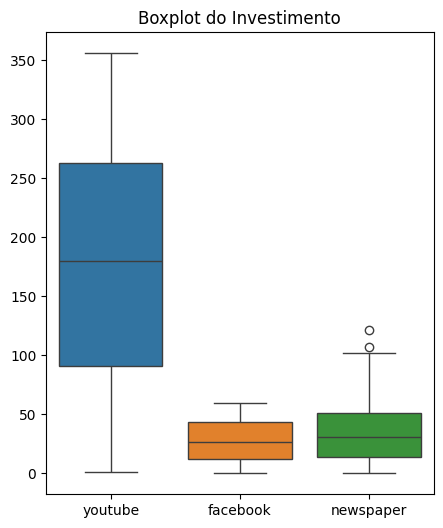

In [ ]:
# boxplot para observar outliers

plt.figure(figsize=(5,6))
sns.boxplot(data=df[["youtube", "facebook", "newspaper"]])
plt.title("Boxplot do Investimento")
plt.show()

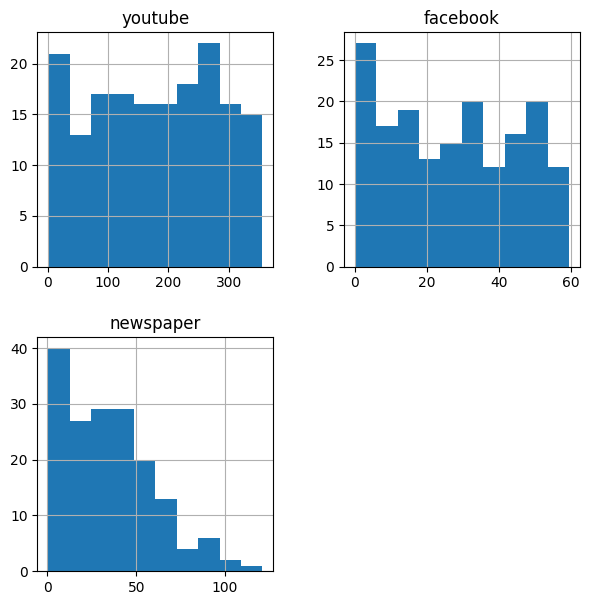

In [ ]:
# histograma para observar distribuição dos investimentos nas 3 plataformas

df[["youtube", "facebook", "newspaper"]].hist(figsize=(7,7))
plt.show()

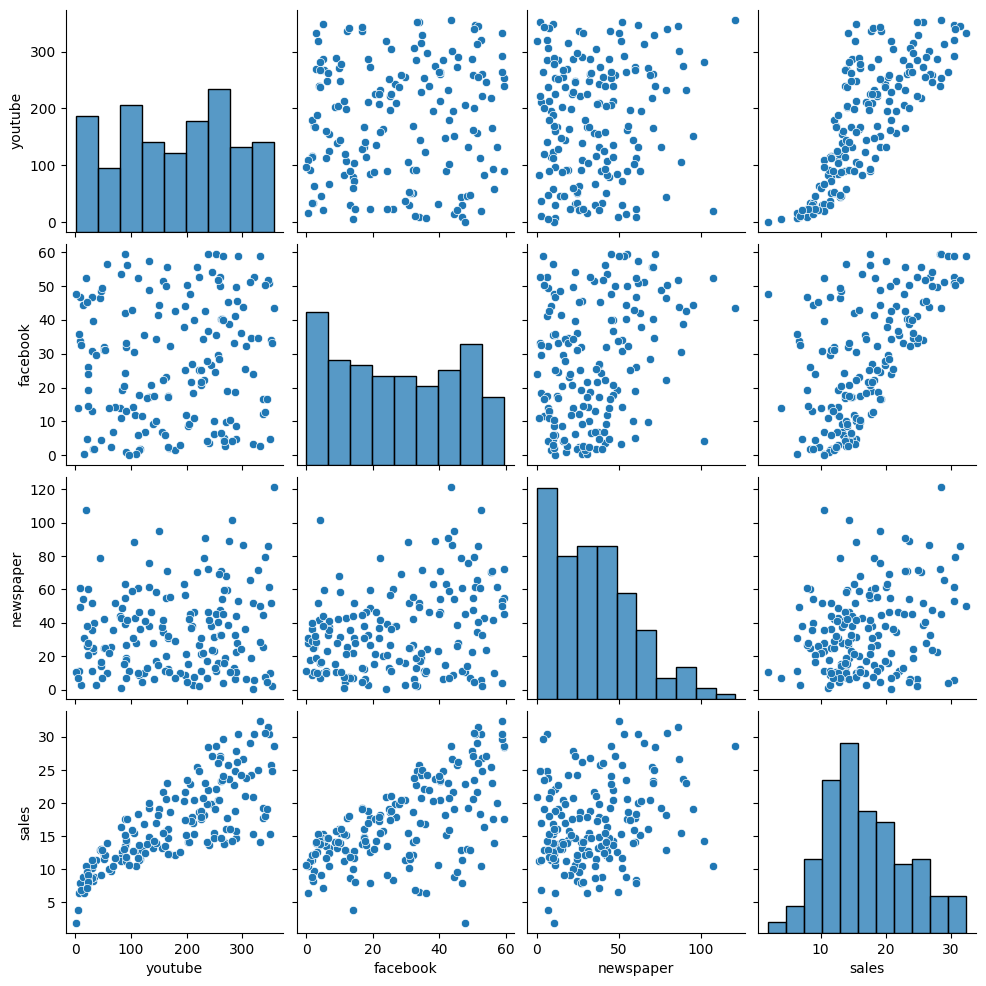

In [ ]:
# observar as relações entre as variáveis
sns.pairplot(df)
plt.show()

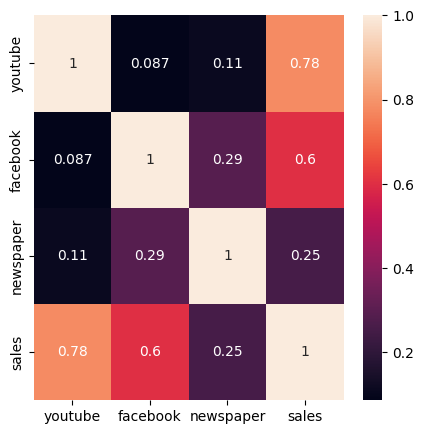

In [ ]:
# heatmap de correlacão entre as variáveis
correlacao = df.corr()

plt.figure(figsize=(5,5))
sns.heatmap(correlacao, annot=True)
plt.show()

## **Etapa 03: Modelagem**
Nesta etapa, buscou-se treinar o modelo de regressão linear para, em seguida, avaliar o seu desempenho.

In [ ]:
# importanto a bibioteca para treinar o modelo de regressão linear
from sklearn.model_selection import train_test_split

# setando features e target
X = df[["youtube", "facebook", "newspaper"]]
Y = df["sales"]

In [ ]:
# dividindo os dados em 70% treinamento e 30% teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(119, 3)
(52, 3)
(119,)
(52,)


In [ ]:
# importando biblioteca para realizar a regressão
from sklearn.linear_model import LinearRegression

# definindo a variável do modelo
lm = LinearRegression()

# treinando
lm.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# predições
Y_pred = lm.predict(X_test)

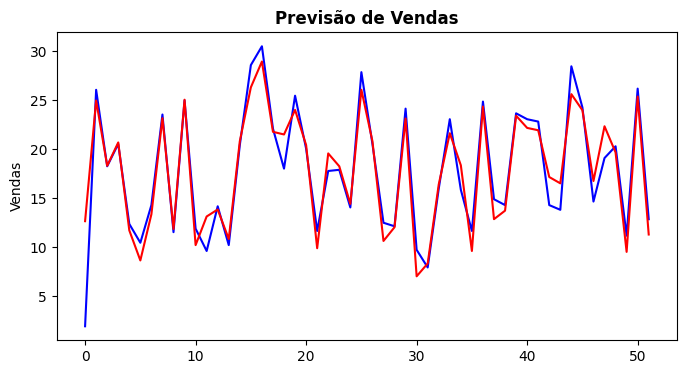

In [ ]:
# comparando valores reais vs valores de predições
plt.figure(figsize=(8,4))
plt.plot(Y_test.values, color="blue")
plt.plot(Y_pred, color="red")
plt.title("Previsão de Vendas", fontweight="bold")
plt.ylabel("Vendas")
plt.show()

## **Etapa 04: Calculando predição**
Nesta etapa, o modelo treinado foi utilizado para prever o valor de vendas com base em novos dados de entrada.

In [ ]:
# importando biblioteca para aplicar o r²
from sklearn.metrics import r2_score

# calculando o r²
r = r2_score(Y_test, Y_pred)

print("r_quadrado: ", r)

r_quadrado:  0.882423505618885


In [ ]:
# predições com alguns valores do df
resultado = pd.DataFrame({"Real": Y_test, "Predição": Y_pred}).head()
display(resultado)

,Real,Predição
101,1.92,12.639292
55,26.04,24.949548
56,18.24,18.291216
139,20.52,20.670672
157,12.36,11.705180


In [ ]:
# predição com valores de entrada para as features (com a possibilidade de aplicar um input)
youtube = 20   # float(input("Investimento Yt: "))
facebook = 10   # float(input("Investimento Fb: "))
newspaper	= 5  # float(input("Investimento Np: "))

entrada = [[youtube,facebook,newspaper]];

In [ ]:
# visualização do resultado
lm.predict(entrada)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


6.450305081932758

## **Conclusão**
Neste projeto, foram analisados dados de investimentos em marketing com o intuito de construir um modelo de regressão linear que realiza uma predição do valor de vendas.

* Há uma forte correlação entre a variável *youtube* e o target *sales*, sinalizando que investimentos nesta plataforma incrementam as vendas.
* Foram identificados outliers nos investimentos em *newspaper*, que provavelmente influenciam na performance do modelo de regressão linear.
* O valor da métrica r² é próximo de 1, o que demonstra eficácia do modelo.
* Observando o gráfico dos *valores teste* vs. *valores predição*, pode-se concluir que o modelo no geral tende a "acertar" os valores, mas há uma oportunidade de melhoria, como o tratamento de outliers e análise de outras métricas de eficácia do modelo - além do r².